In [2]:
import tensorflow as tf

In [3]:
#We add the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

8


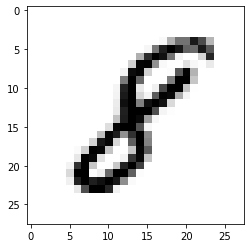

In [5]:
#Example of the content of the dataset
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.2142 - acc: 0.9350
Epoch 2/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0863 - acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0598 - acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0456 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0360 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0298 - acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.0245 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0201 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0209 - acc: 0.9932
Epoch 10/10
60000/60000 [=========

In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 83us/step


[0.05672209554141155, 0.9857]

Prediction: 8
Data: 8


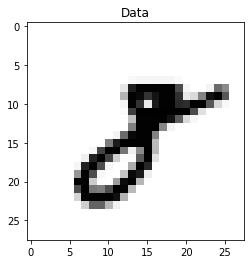

In [119]:
import random
cat = None
while cat != 8:
    image_index = random.randint(1,9999)
    cat = y_test[image_index]
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Data")
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Prediction: "+str(pred.argmax()))
print("Data: "+str(y_test[image_index]))

In [74]:
import random

ntests = 10000
success_percentage = 0.0

for i in range(ntests):
    image_index = random.randint(0,9999)
    result = y_test[image_index]
    pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
    if pred.argmax() == result:
        success_percentage += float(1/ntests)
        
print("Success proportion: " + str("%.4f" % success_percentage))
    
    
    

Success proportion: 0.9859
